# Laboratorio 1 - Preparación y Visualización de Datos

## Grupo 1 - Paula Hípola Gómez, José Ignacio Navas Sanz y Belén Ortega Pérez

## Entregable 3 - Principal Component Analysis (PCA)

### 3.1 – (0.5 puntos) Estandarización y normalización de datos. 
#### Para evitar que las diferencias de rango en los datos supongan un problema a la hora de procesar la información, el primer paso es estandarizar y normalizar los datos. Usad el método StandardScaler de la librería scikit-learn.

In [1]:
%config IPCompleter.greedy=True

#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy import linalg as LA
np.set_printoptions(suppress=True)

#Importamos el CSV del FIFA
df_fifa = pd.read_csv('fifa19.csv')

#Sacamos por pantalla los primeros datos para ver el dataset
df_fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [2]:
#Limpieza de datos
print('Tamaño sin limpiar',df_fifa.shape[0])
#Quitamos columnas innecesarias# Para estandarizar y normalizar solo nos valen los valores numericos por lo que eliminamos todos los que sean string
df = df_fifa.select_dtypes(exclude=['object'])
df = df.drop(columns=['Unnamed: 0','ID','Jersey Number'])
#Eliminacion de nulos
df = df.dropna()
print('Tamaño sin nulos',df.shape[0])

#Eliminacion de duplicados
df = df.drop_duplicates()
print('Tamaño sin duplicados',df.shape[0])

#Reseteamos el indice de las filas
df = df.reset_index()
df = df.drop(columns=['index'])

#Imprimimos los datos
df.head()

Tamaño sin limpiar 18207
Tamaño sin nulos 18159
Tamaño sin duplicados 18157


,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,2202,5.0,4.0,4.0,84.0,95.0,70.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,2228,5.0,4.0,5.0,84.0,94.0,89.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,2143,5.0,5.0,5.0,79.0,87.0,62.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,1471,4.0,3.0,1.0,17.0,13.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,2281,4.0,5.0,4.0,93.0,82.0,55.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


Dataset Limpio

In [3]:
#Separo entre datos y obtejitvo
valores = ['Potential', 'Special', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
x = df.loc[:, valores].values
y = df.loc[:,['Overall']].values

In [36]:
#Pasamos a estandarizar y normalizar los datos con la libreria StandardScaler
scaler = StandardScaler()
transformado = scaler.fit_transform(x)

In [35]:
print('Dataset transformado')
#Dataframe de estos datos
df = pd.DataFrame(data = transformado, columns = valores).head()
df.head()

Dataset transformado


,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,3.697351,2.214065,9.863890,1.593865,2.167540,1.865997,2.532784,1.018591,2.130412,2.435651,...,1.684706,3.266901,-0.717669,-0.909300,-0.923563,-0.599975,-0.318938,-0.074708,-0.140276,-0.485166
1,3.697351,2.309352,9.863890,1.593865,3.490165,1.865997,2.481566,2.111816,1.518127,2.492171,...,2.321549,3.179444,-0.968881,-0.770822,-1.064477,-0.543464,-0.318938,-0.074708,-0.140276,-0.318086
2,3.534338,1.997834,9.863890,3.107929,3.490165,1.593729,2.123045,0.558285,1.722222,2.322611,...,2.066812,3.091986,-1.019124,-1.093936,-0.594762,-0.430442,-0.437231,-0.074708,-0.081573,-0.318086
3,3.534338,-0.464993,7.326076,0.079802,-1.800335,-1.782399,-1.667035,-1.800779,-0.590857,-1.690302,...,-0.544243,0.818090,-1.622033,-1.232414,-1.534193,4.146949,4.057894,4.288106,4.203721,4.304444
4,3.371325,2.503593,7.326076,3.107929,2.167540,2.356080,1.866959,0.155518,2.266476,2.209571,...,1.939443,2.567241,1.040815,0.475475,0.250726,-0.091376,-0.200646,-0.680654,-0.375087,-0.206700


### 3.2 – (2 puntos) Autovalores y Autovectores
#### El siguiente paso es obtener los autovalores y autovectores que nos permitan caracterizar el espacio de llegada de la proyección donde vamos a reducir la dimensión de nuestros datos, estudiando cuántos componentes (dimensiones) necesitamos para representar los datos iniciales. Para esto, primero hay que obtener la matriz de covarianza utilizando el método cov de la librería numpy, y luego obtener los autovalores/autovectores de la matriz utilizando el método linalg.eig también de la librería numpy. Al final de este apartado, tienes que obtener un DataFrame con el porcentaje de varianza y el porcentaje acumulado por cada componente. Además, tienes que explicar qué quieren decir estos datos y cómo se relacionan con los datos.

In [5]:
df_varianza = pd.DataFrame({"% varianza" : [], "% acumulado" : []})
df_componentes = pd.DataFrame({'Componente 1': [], 'Componente 2': []})

In [52]:
#Ya tenemos calculada la matriz con los datos normalizados, por lo que procedemos a obtener la matriz de covarianza
matrizCovarianza = np.cov(transformado,rowvar=False)
print(matrizCovarianza)

[[ 1.00005508  0.38458416  0.37304133 ... -0.05903565 -0.05256832
  -0.05332771]
 [ 0.38458416  1.00005508  0.29226785 ... -0.6702821  -0.66830843
  -0.67328393]
 [ 0.37304133  0.29226785  1.00005508 ...  0.00063635  0.00689233
   0.00343577]
 ...
 [-0.05903565 -0.6702821   0.00063635 ...  1.00005508  0.96439053
   0.96639425]
 [-0.05256832 -0.66830843  0.00689233 ...  0.96439053  1.00005508
   0.9701835 ]
 [-0.05332771 -0.67328393  0.00343577 ...  0.96639425  0.9701835
   1.00005508]]


In [53]:
df_autov = pd.DataFrame({"autovalores" : [], "autovectores" : []})
autovalores, autovectores = np.linalg.eig(matrizCovarianza)
df_autov['autovalores'] = autovalores
df_autov['autovectores'] = [autovectores[:,i] for i in range(len(autovectores))]
df_autov.head()

,autovalores,autovectores
0,20.685018,"[-0.07021088065914884, -0.21074299552282474, -..."
1,5.019873,"[-0.030595798828377416, 0.0165833574084372, -0..."
2,3.032010,"[-0.3022383625547229, -0.12885643637807626, -0..."
3,1.744817,"[-0.13897434474457296, -0.06498673161335286, 0..."
4,1.332938,"[0.15241267890327365, 0.017925326441567052, 0...."


In [54]:
#Calculamos el porcentaje de varianza de los autovalores
porcentaje = (autovalores / autovalores.sum())*100
df_varianza['% varianza'] = porcentaje

In [55]:
#Porcentaje de varianza acumulado
acumulado = np.cumsum([i*(100/sum(autovalores)) for i in autovalores])
df_varianza['% acumulado'] = acumulado

In [56]:
df_total = pd.DataFrame({"% de varianza" : [], "% acumulado" : []})
df_total["% de varianza"] = porcentaje
df_total["% acumulado"] = acumulado
df_total.head()

,% de varianza,% acumulado
0,53.035588,53.035588
1,12.870761,65.906349
2,7.773958,73.680306
3,4.473643,78.153950
4,3.417600,81.571550


Con los autovalores y el porcentaje de varianza y el porcentaje de varianza acumulado podemos observar que los campos que más determinan el valor y calidad de un jugador en el FIFA son, su edad, su puntuación media (OVERALL) y su posible puntuación máxima (POTENTIAL). Estos valores nos cubren aproximadamente el 72% de los datos. Si cogiéramos hasta el 5º atributo, en este caso estaríamos incluyendo los datos de 'International Reputation', 'Weak Foot' y 'Skill Moves' lo que nos da una visión más completa de un jugador y con estos datos llegamos a cubrir hasta un 83% de nuestro dataset, un valor bastante preciso en el que no perdemos excesiva información, pero como queremos pintar los datos en el eje (X,Y) sólamente cogeremos los dos primeros componentes. Eso sí, debemos recordar que estaremos representando el 62.54% de los datos, con una pérdida significativa cercana al 40% (37.46% para ser concretos).

In [57]:
#Como los autovalores mas grandes son los dos primeros, cogemos los dos primeros
df_componentes['Componente 1'] = df_autov["autovectores"].loc[0]
df_componentes['Componente 2'] = df_autov["autovectores"].loc[1]
df_componentes.head()

,Componente 1,Componente 2
0,-0.070211,-0.030596
1,-0.210743,0.016583
2,-0.049041,-0.017695
3,-0.080241,-0.087021
4,-0.180518,-0.119959


Dados estos datos, podemos observar que la Componente1 se para a dar importancia a los valores para jugadores de campo mientras que la Componente2 se centra en los valores para los porteros. ¿Cómo hemos llegado a este punto? Observando que para la C1, los valores para los porteros son negativos y para la C2 son positivos y además valores típicos para jugadores como pueden ser los aspectos defensivos (entradas, agresividad o anticipación) no puntúan positivo en la C2 mientras que en la C1 sí que lo hacen

### 3.3 – (1 punto) Representar gráficamente los elementos del dataset
#### Finalmente, queremos representar gráficamente los elementos de nuestro dataset utilizando la descomposición que hemos calculado en el apartado 3.2. Obtén un diagrama de dispersión en 2 dimensiones y comenta/interpreta el resultado. Es necesario que el diagrama contenga toda la información necesaria. Además, tienes que interpretar la información que proporciona el eje X y el eje Y. Para terminar, elige al menos 4 individuos ¿qué puedes decir de ellos después del análisis que has realizado?

In [58]:
df_componentes.head()

,Componente 1,Componente 2
0,-0.070211,-0.030596
1,-0.210743,0.016583
2,-0.049041,-0.017695
3,-0.080241,-0.087021
4,-0.180518,-0.119959


In [59]:
overall = [94,93,92,91,90,89,88,87,86,85,84,83,82,81,80,79,78,77,76,75,74,73,72,71,70,69,68,67,66,65,
64,63,62,61,60,59,58,57,56]
df_valores = pd.DataFrame({"Overall" : overall})

In [60]:
finalDf = pd.concat([df_componentes, df_valores], axis = 1)
finalDf.head()

,Componente 1,Componente 2,Overall
0,-0.070211,-0.030596,94
1,-0.210743,0.016583,93
2,-0.049041,-0.017695,92
3,-0.080241,-0.087021,91
4,-0.180518,-0.119959,90


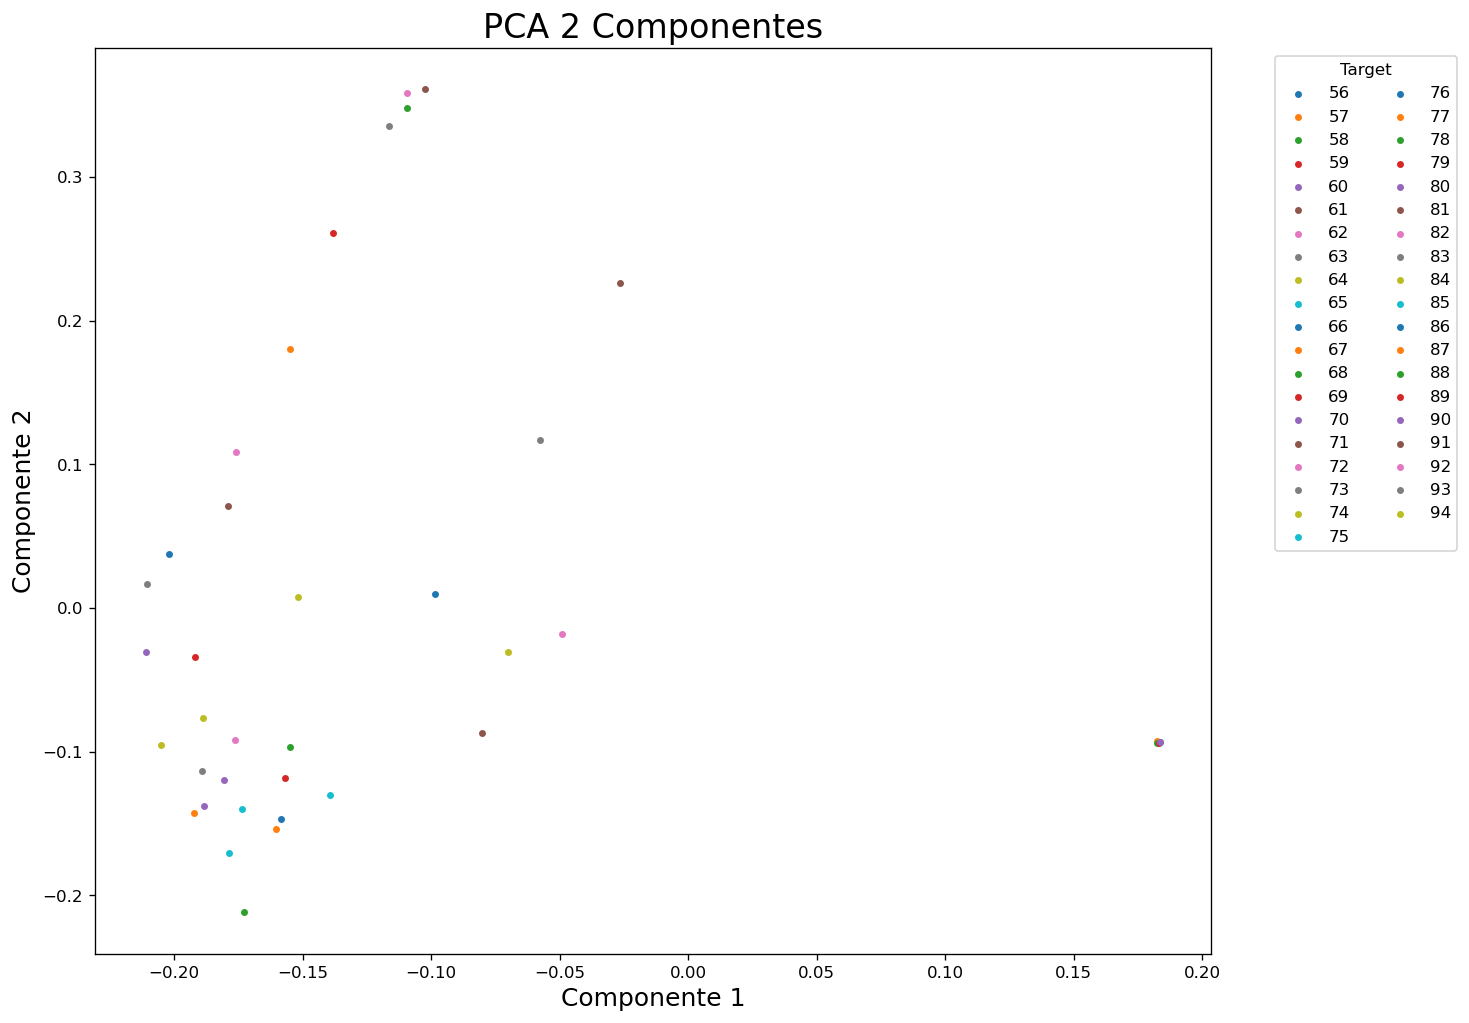

In [61]:
fig = plt.figure(figsize = (12,10), dpi=120)
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('PCA 2 Componentes', fontsize = 20)


targets = finalDf['Overall'].values
for target in set(targets):
    indicesToKeep = finalDf['Overall'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Componente 1'],
               finalDf.loc[indicesToKeep, 'Componente 2'],
               s = 10)
ax.legend(set(targets),ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1), title='Target')

### 3.4- (0.5 punto) Repite los pasos 3.2 y 3.3 utilizando las funcionalidades disponibles en la librería scikitlearn.
#### Compara los resultados y coméntalos. ¿Hay alguna diferencia notable entre las dos implementaciones?

In [16]:
from sklearn.decomposition import PCA

In [17]:
#Saco los datos
df_fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [18]:
#Limpiamos datos de df_fifa
#Limpieza de datos
print('Tamaño sin limpiar',df.shape[0])
#Quitamos columnas innecesarias# Para estandarizar y normalizar solo nos valen los valores numericos por lo que eliminamos todos los que sean string
df = df_fifa.select_dtypes(exclude=['object'])
df = df.drop(columns=['Unnamed: 0','ID','Jersey Number'])
#Eliminacion de nulos
df = df.dropna()
print('Tamaño sin nulos',df.shape[0])

#Eliminacion de duplicados
df = df.drop_duplicates()
print('Tamaño sin duplicados',df.shape[0])

#Reseteamos el indice de las filas
df = df.reset_index()
df = df.drop(columns=['index'])

#Imprimimos los datos
df.head()

Tamaño sin limpiar 5
Tamaño sin nulos 18159
Tamaño sin duplicados 18157


,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,2202,5.0,4.0,4.0,84.0,95.0,70.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,2228,5.0,4.0,5.0,84.0,94.0,89.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,2143,5.0,5.0,5.0,79.0,87.0,62.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,1471,4.0,3.0,1.0,17.0,13.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,2281,4.0,5.0,4.0,93.0,82.0,55.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [19]:
features = ['Potential', 'Special', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
x = df.loc[:, features].values

In [20]:
y = df.loc[:,['Overall']].values

In [21]:
#Estandarizamos los datos
x = StandardScaler().fit_transform(x)

In [22]:
x

array([[ 3.69735122,  2.21406452,  9.86389013, ..., -0.07470791,
        -0.14027598, -0.48516556],
       [ 3.69735122,  2.30935247,  9.86389013, ..., -0.07470791,
        -0.14027598, -0.31808614],
       [ 3.53433788,  1.99783417,  9.86389013, ..., -0.07470791,
        -0.08157332, -0.31808614],
       ...,
       [-0.70400898, -1.49850062, -0.28736833, ..., -0.37768107,
        -0.60989727, -0.20669986],
       [-0.86702232, -1.3555687 , -0.28736833, ..., -0.13530254,
        -0.49249195, -0.42947242],
       [-0.86702232, -1.01473103, -0.28736833, ..., -0.4382757 ,
        -0.2576813 , -0.42947242]])

In [23]:
#Dataframe de estos datos
pd.DataFrame(data = x, columns = features).head()

,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,3.697351,2.214065,9.863890,1.593865,2.167540,1.865997,2.532784,1.018591,2.130412,2.435651,...,1.684706,3.266901,-0.717669,-0.909300,-0.923563,-0.599975,-0.318938,-0.074708,-0.140276,-0.485166
1,3.697351,2.309352,9.863890,1.593865,3.490165,1.865997,2.481566,2.111816,1.518127,2.492171,...,2.321549,3.179444,-0.968881,-0.770822,-1.064477,-0.543464,-0.318938,-0.074708,-0.140276,-0.318086
2,3.534338,1.997834,9.863890,3.107929,3.490165,1.593729,2.123045,0.558285,1.722222,2.322611,...,2.066812,3.091986,-1.019124,-1.093936,-0.594762,-0.430442,-0.437231,-0.074708,-0.081573,-0.318086
3,3.534338,-0.464993,7.326076,0.079802,-1.800335,-1.782399,-1.667035,-1.800779,-0.590857,-1.690302,...,-0.544243,0.818090,-1.622033,-1.232414,-1.534193,4.146949,4.057894,4.288106,4.203721,4.304444
4,3.371325,2.503593,7.326076,3.107929,2.167540,2.356080,1.866959,0.155518,2.266476,2.209571,...,1.939443,2.567241,1.040815,0.475475,0.250726,-0.091376,-0.200646,-0.680654,-0.375087,-0.206700


In [24]:
pca = PCA(n_components=2)

In [25]:
principalComponents = pca.fit_transform(x)

In [26]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['Componente 1', 'Componente 2'])

In [27]:
principalDf.head(5)

,Componente 1,Componente 2
0,-9.719387,-5.684681
1,-9.744158,-4.276871
2,-9.333076,-5.669983
3,7.937426,-2.444599
4,-9.670906,-2.151793


In [28]:
df_fifa[['Overall']].head()

,Overall
0,94
1,94
2,92
3,91
4,91


In [29]:
finalDf = pd.concat([principalDf, df_fifa[['Overall']]], axis = 1)
finalDf.head()

,Componente 1,Componente 2,Overall
0,-9.719387,-5.684681,94
1,-9.744158,-4.276871,94
2,-9.333076,-5.669983,92
3,7.937426,-2.444599,91
4,-9.670906,-2.151793,91


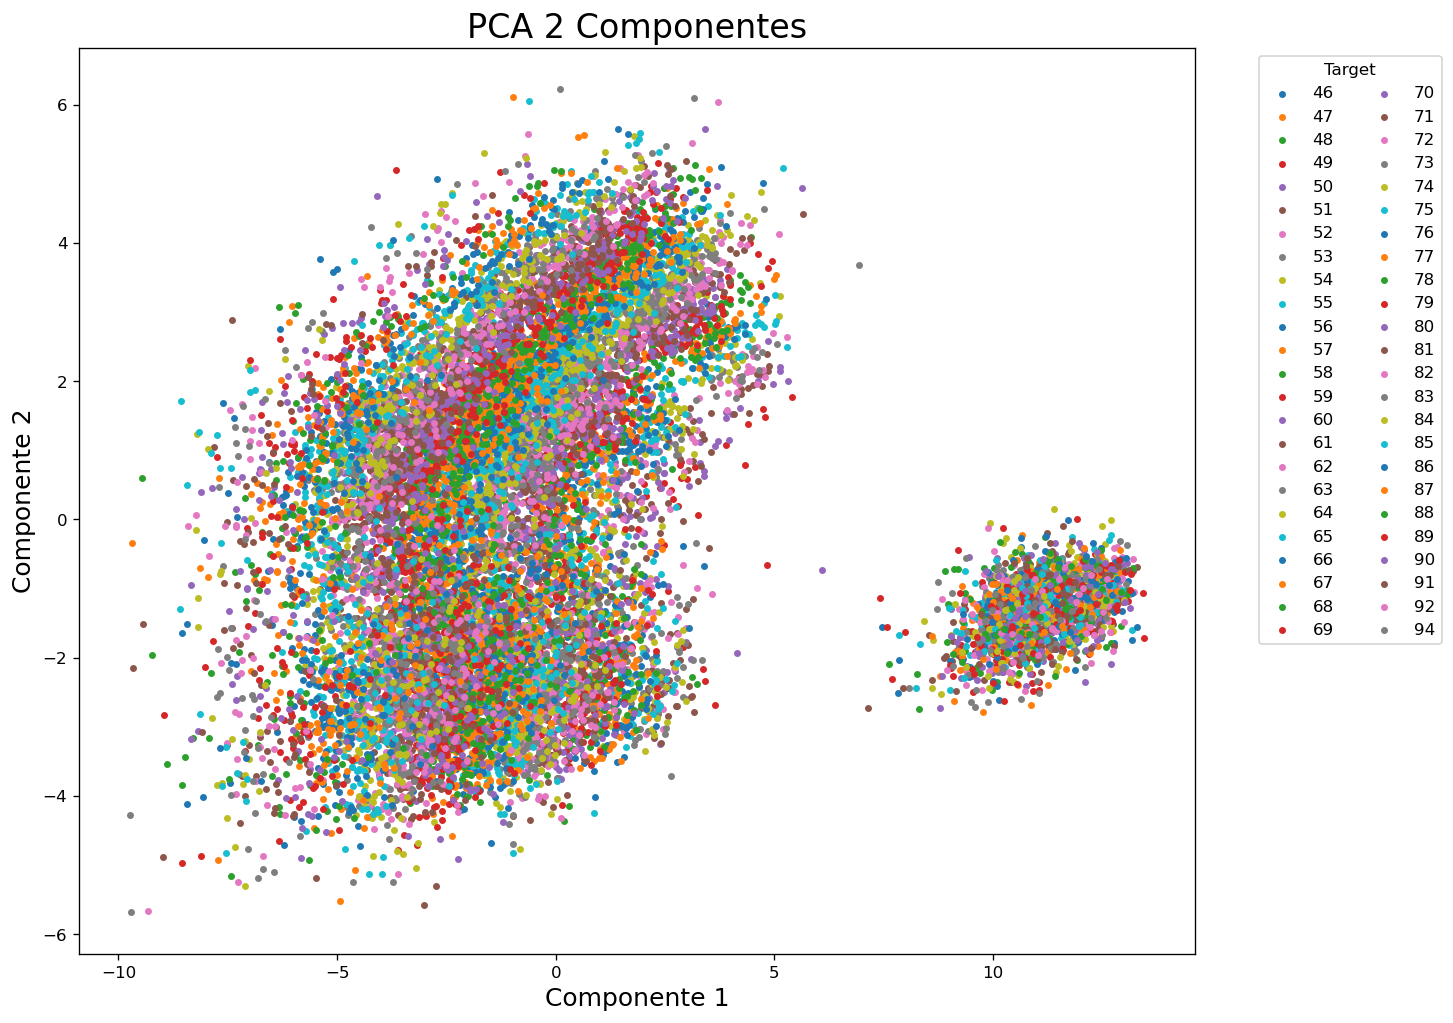

In [30]:
fig = plt.figure(figsize = (12,10), dpi=120)
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('PCA 2 Componentes', fontsize = 20)

targets = finalDf['Overall'].values
for target in set(targets):
    indicesToKeep = finalDf['Overall'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Componente 1'],
               finalDf.loc[indicesToKeep, 'Componente 2'],
               s = 10)
ax.legend(set(targets),ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1), title='Target')

In [31]:
print('La media de puntuación de jugadores en FIFA es de',targets.mean())

La media de puntuación de jugadores en FIFA es de 66.23869940132916


In [32]:
#